In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

cnx=mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="bhupesh574"
)

In [2]:
query="Select * from Banking.customer"
df=pd.read_sql(query,cnx)
df.count()


C:\Users\BHUPESH\AppData\Local\Temp\ipykernel_10248\359685360.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,cnx)


ï»¿Client ID                3000
Name                        3000
Age                         3000
Location ID                 3000
Joined Bank                 3000
Banking Contact             3000
Nationality                 3000
Occupation                  3000
Fee Structure               3000
Loyalty Classification      3000
Estimated Income            3000
Superannuation Savings      3000
Amount of Credit Cards      3000
Credit Card Balance         3000
Bank Loans                  3000
Bank Deposits               3000
Checking Accounts           3000
Saving Accounts             3000
Foreign Currency Account    3000
Business Lending            3000
Properties Owned            3000
Risk Weighting              3000
BRId                        3000
GenderId                    3000
IAId                        3000
dtype: int64

In [3]:
df.shape

(3000, 25)

In [4]:
bins = [0,100000,300000,float('inf')]
labels =['Low','Mid','High']

df['Income Band'] = pd.cut(df['Estimated Income'],bins=bins, labels=labels,right=False)

<Axes: xlabel='Income Band'>

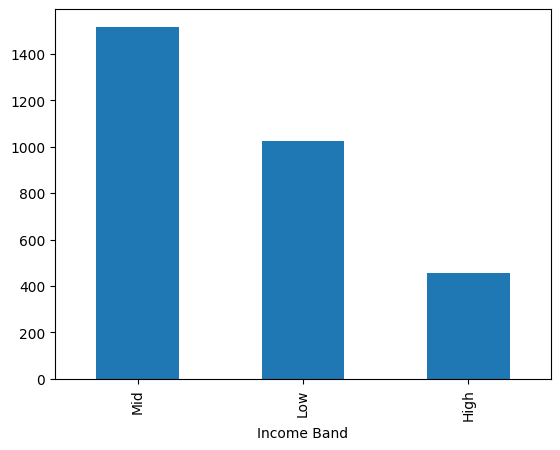

In [5]:
df['Income Band'].value_counts().plot(kind='bar')

In [6]:
Categorical_cols = df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting"]].columns

for col in Categorical_cols:
    print(f"Value Counts for '{col}':")   
    display(df[col].value_counts())               

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Univarited Analysis

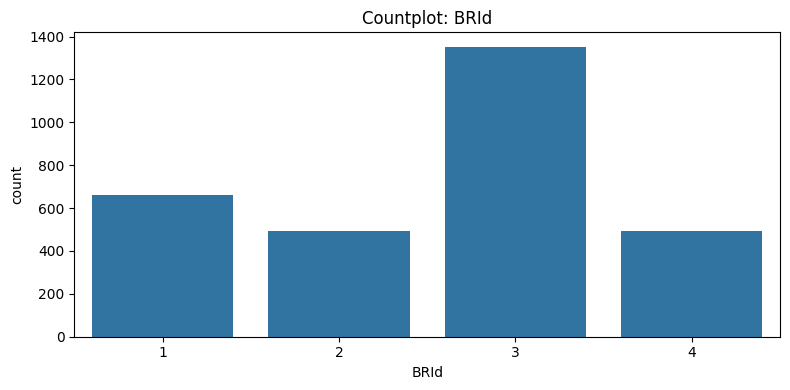

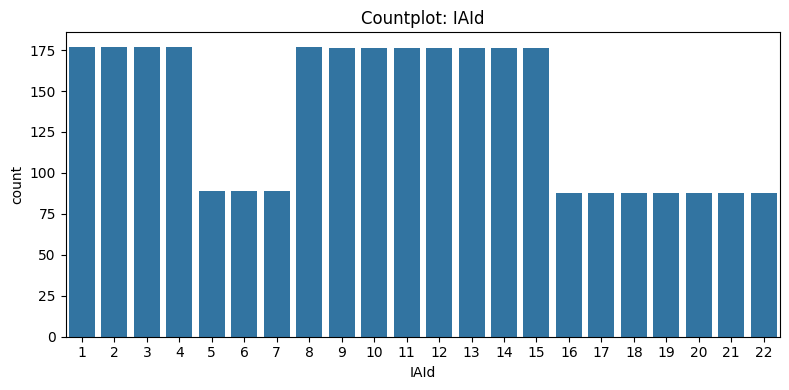

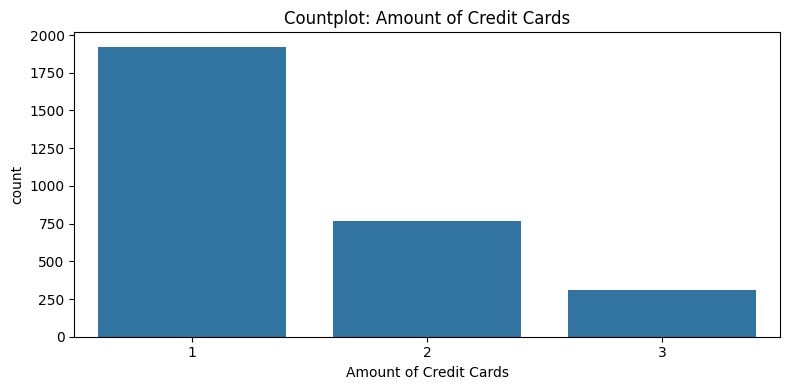

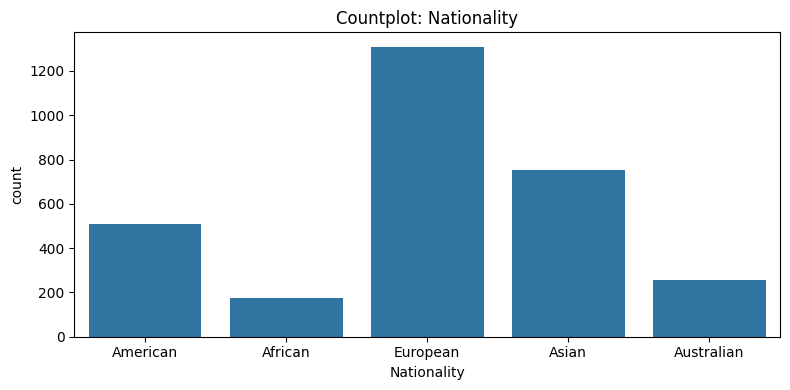

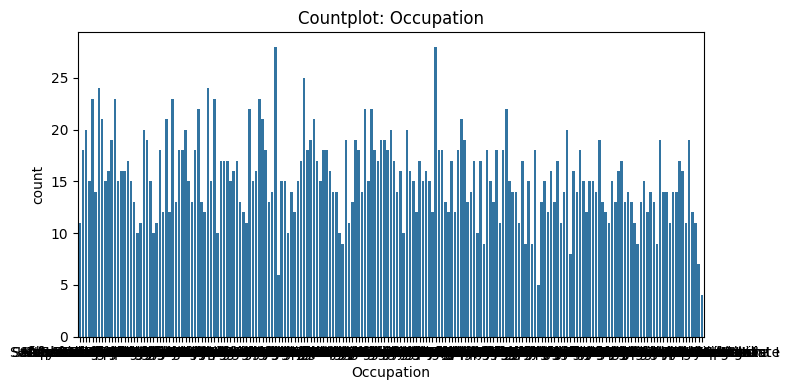

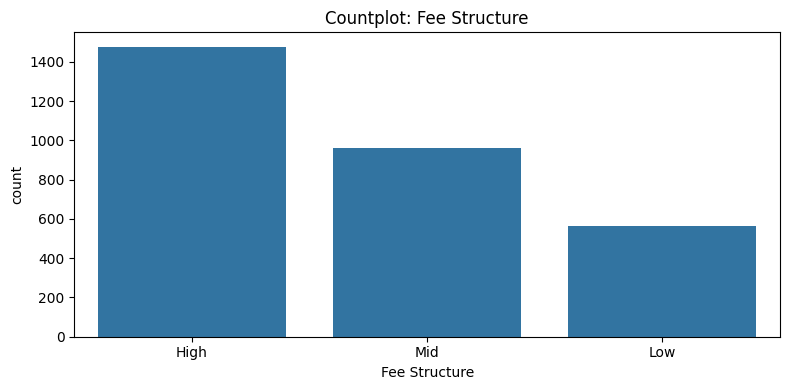

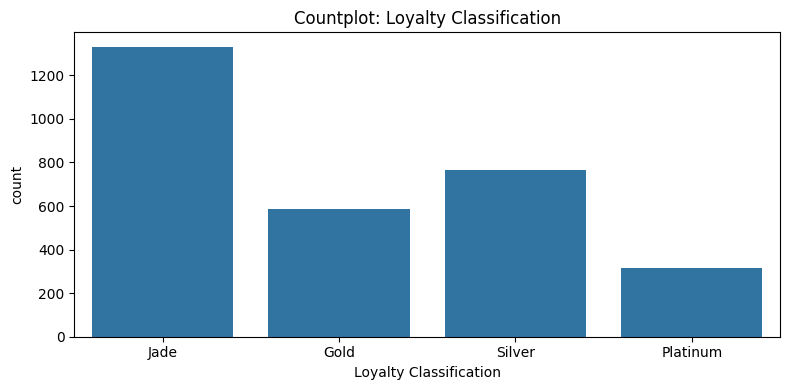

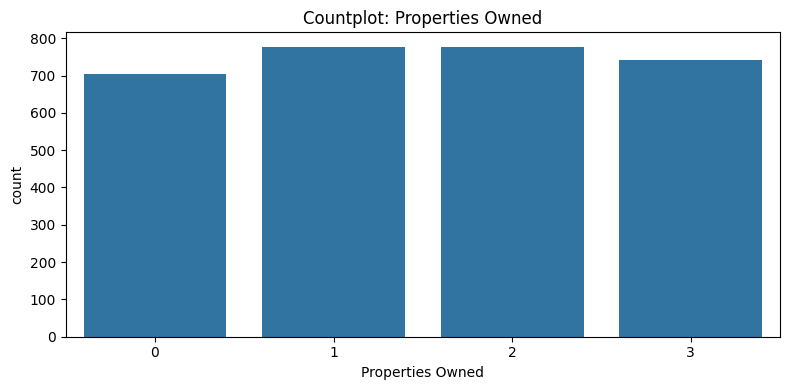

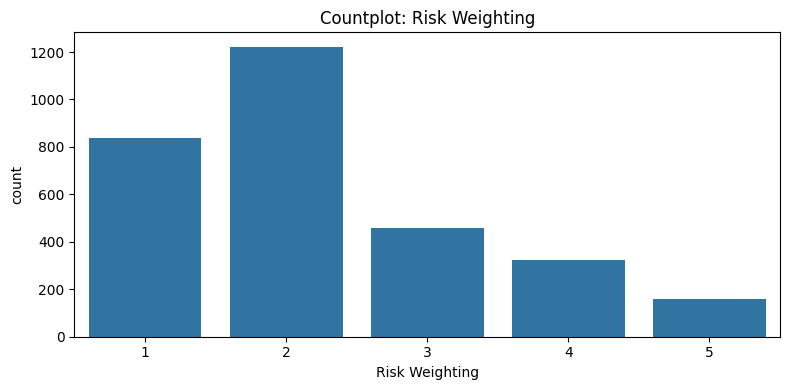

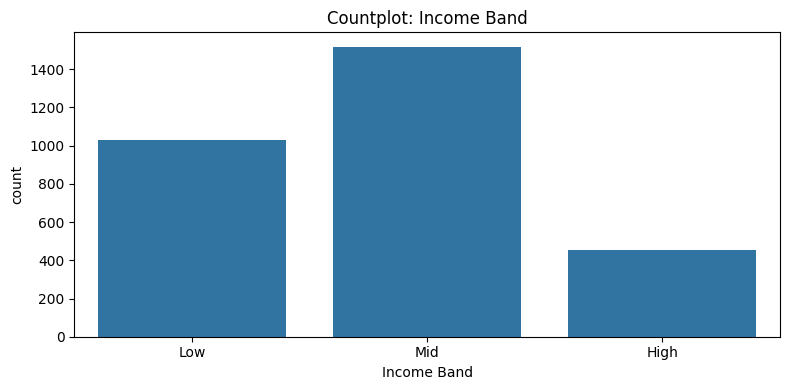

In [7]:
cols = ["BRId","IAId","Amount of Credit Cards","Nationality","Occupation",
        "Fee Structure","Loyalty Classification","Properties Owned",
        "Risk Weighting","Income Band"]

for i, predictor in enumerate(cols):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=predictor)
    plt.title(f"Countplot: {predictor}")
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Bivariate Analysis


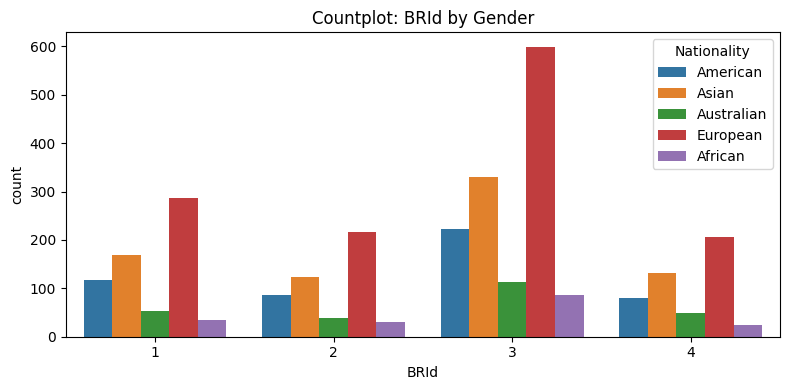

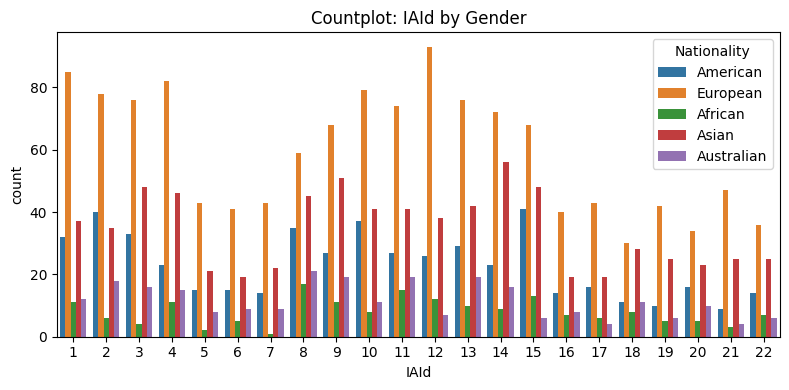

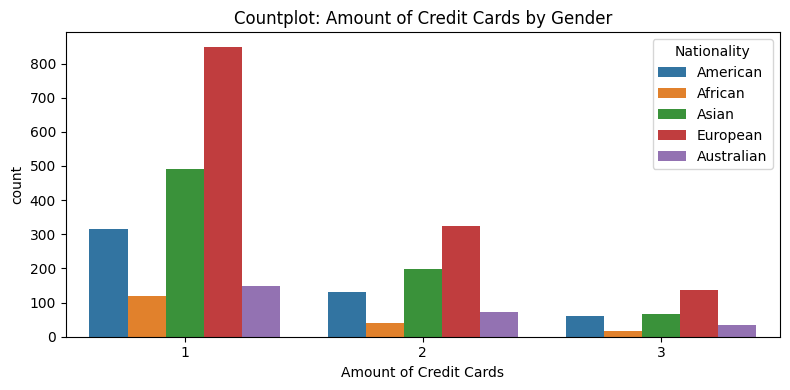

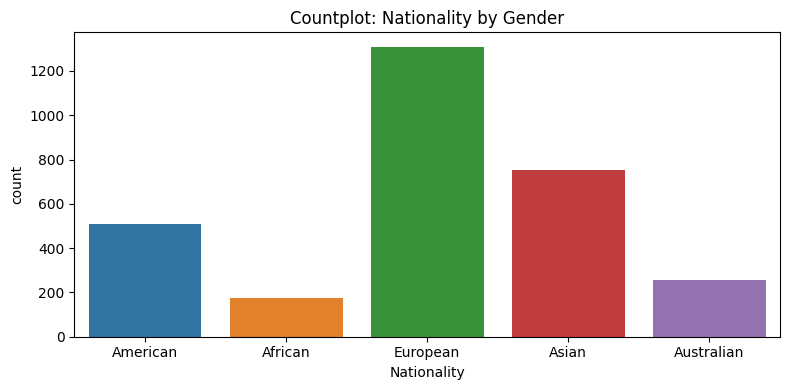

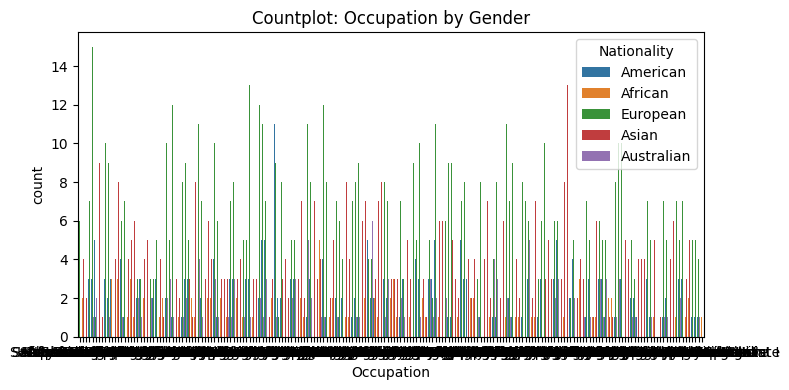

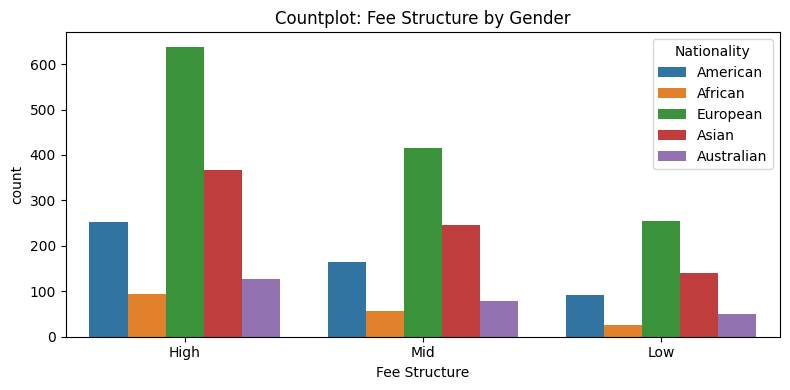

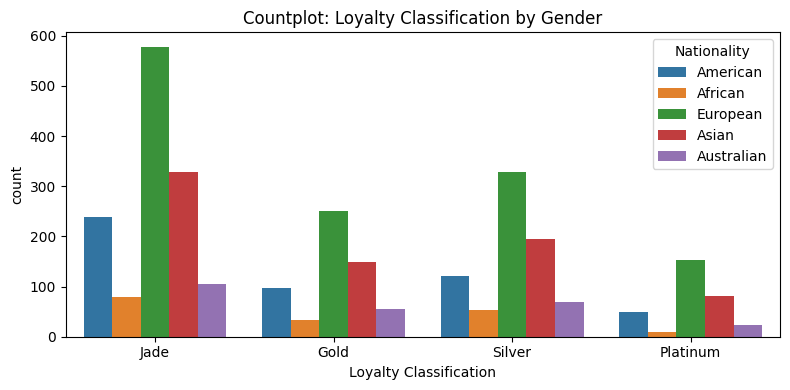

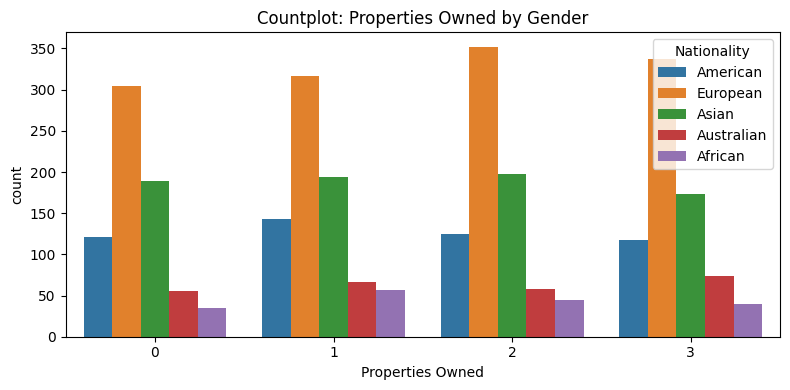

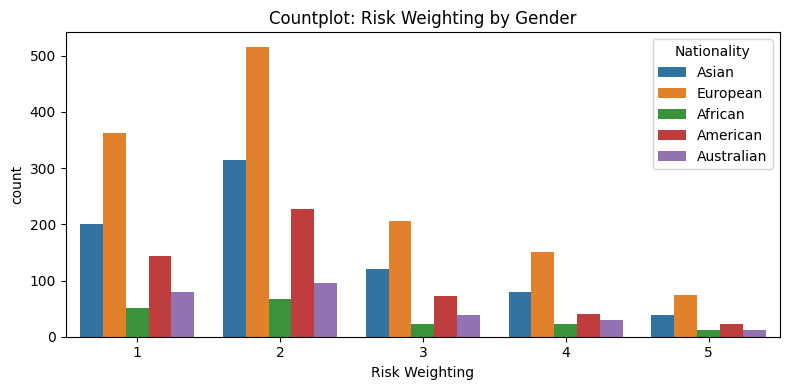

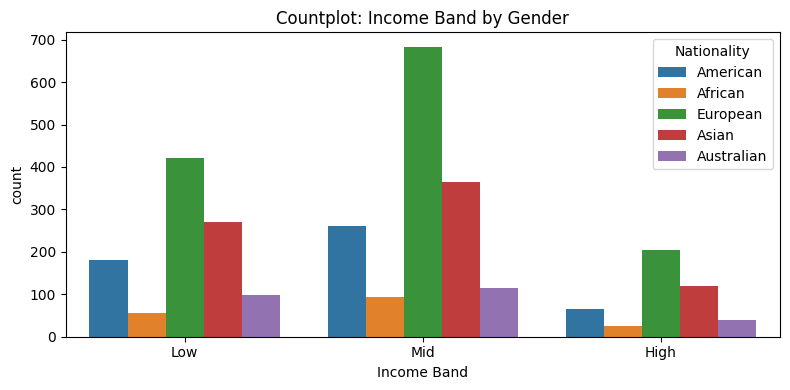

In [8]:
cols = ["BRId","IAId","Amount of Credit Cards","Nationality","Occupation",
        "Fee Structure","Loyalty Classification","Properties Owned",
        "Risk Weighting","Income Band"]

for i, predictor in enumerate(cols):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=predictor, hue='Nationality')
    plt.title(f"Countplot: {predictor} by Gender")
#   plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


HIsplot of values counts for different Occupation

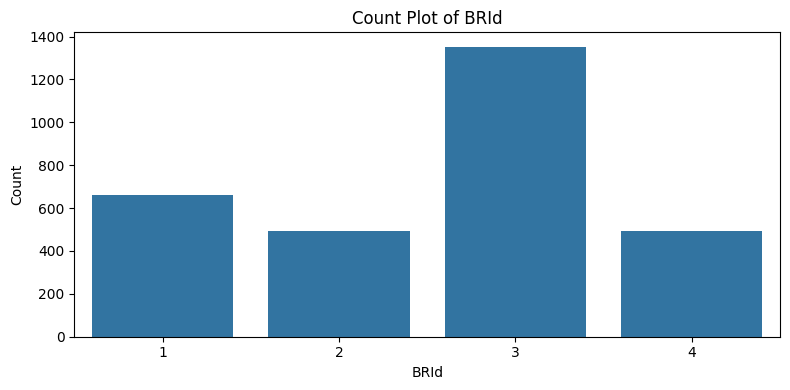

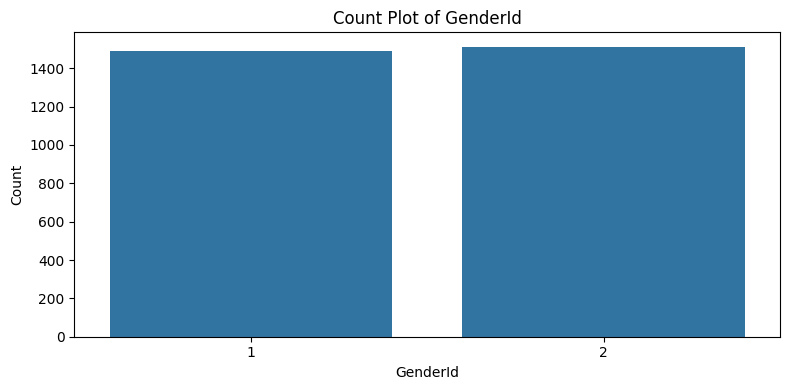

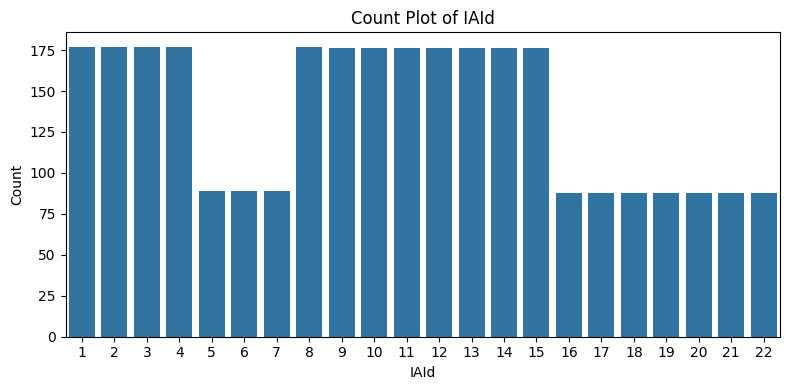

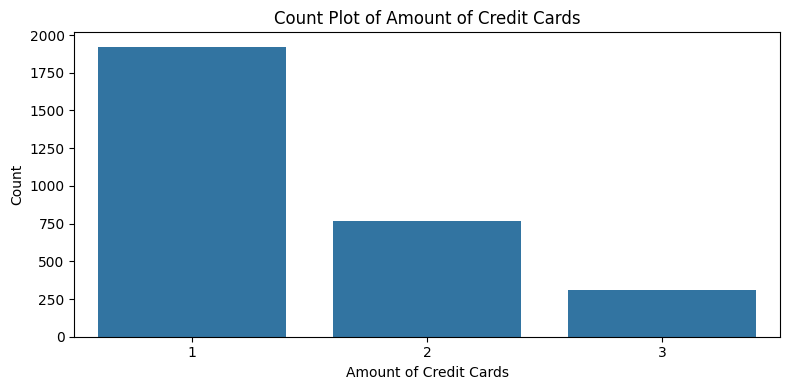

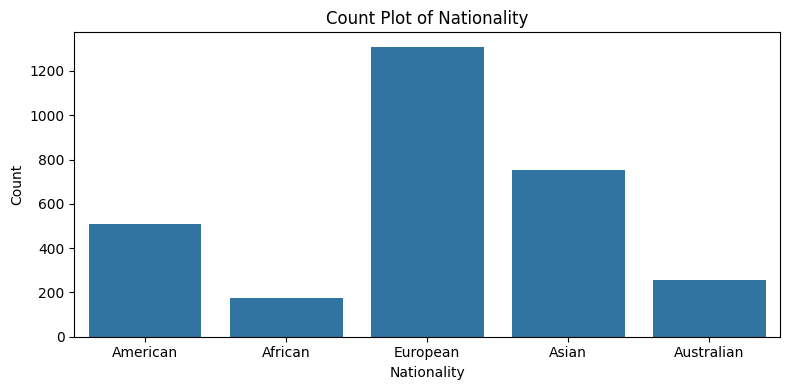

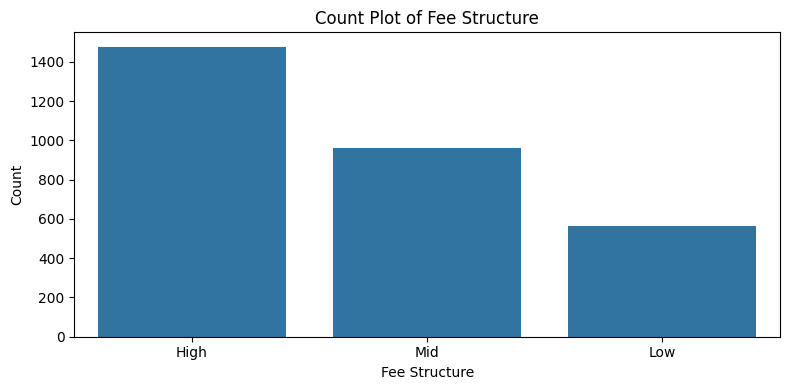

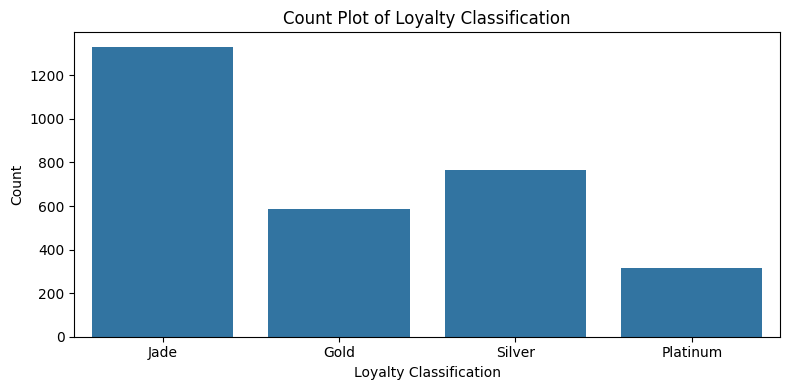

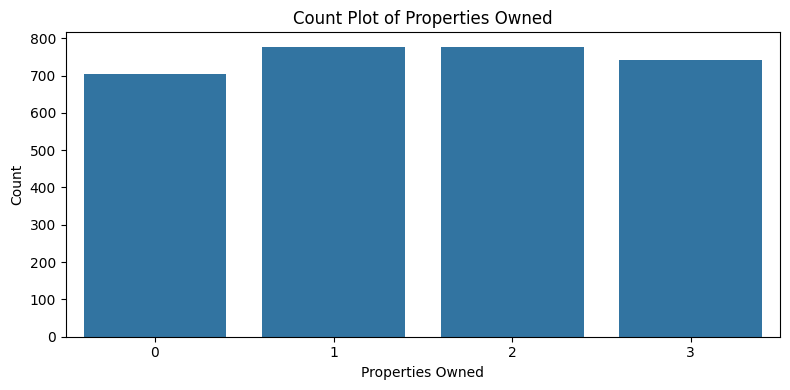

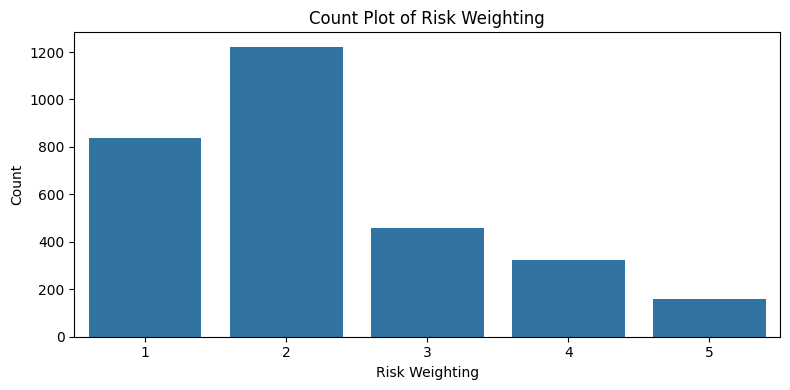

In [9]:
for col in Categorical_cols:
    if col == "Occupation":
        continue
    
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


Numerical Analysis


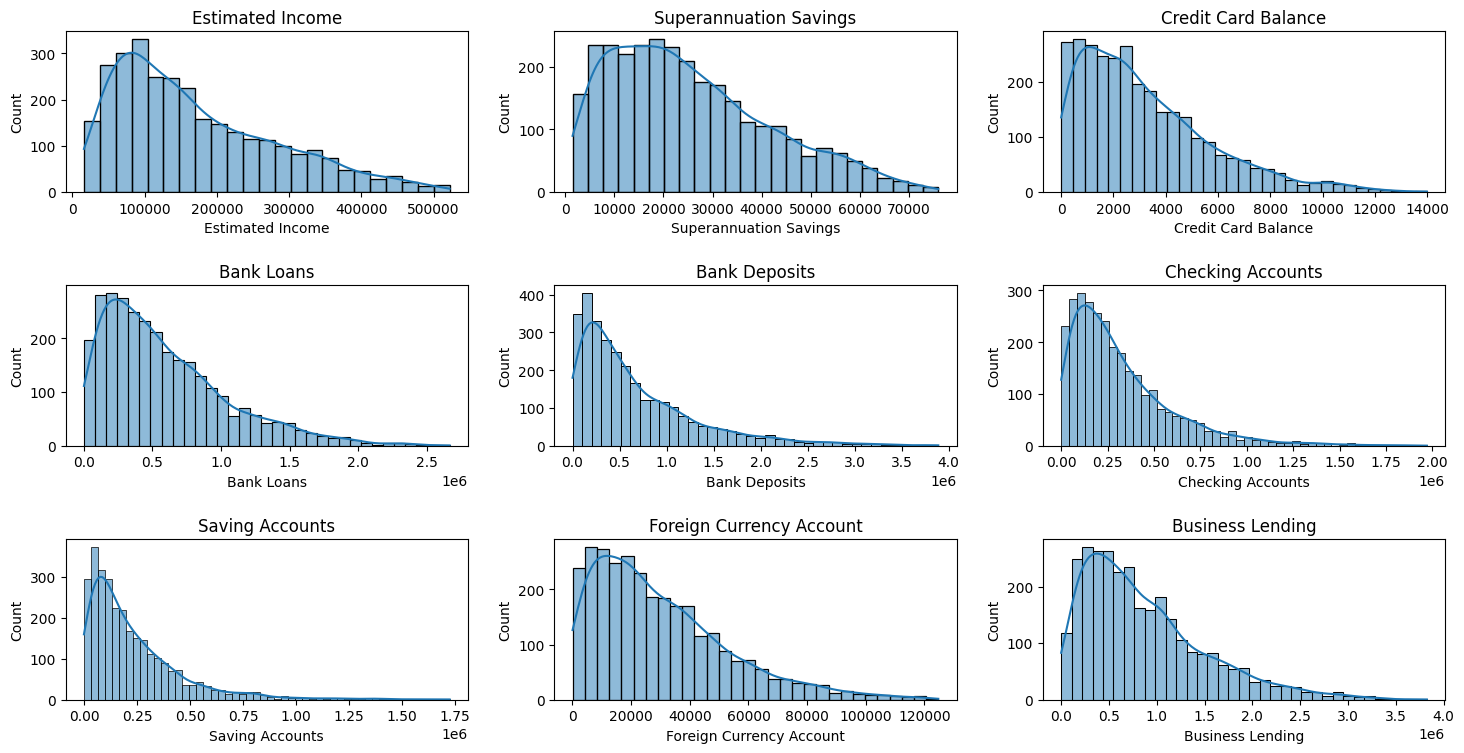

In [10]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts', 'Foreign Currency Account','Business Lending']

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
    plt.tight_layout(pad=2.0)
plt.show()

HeatMaps

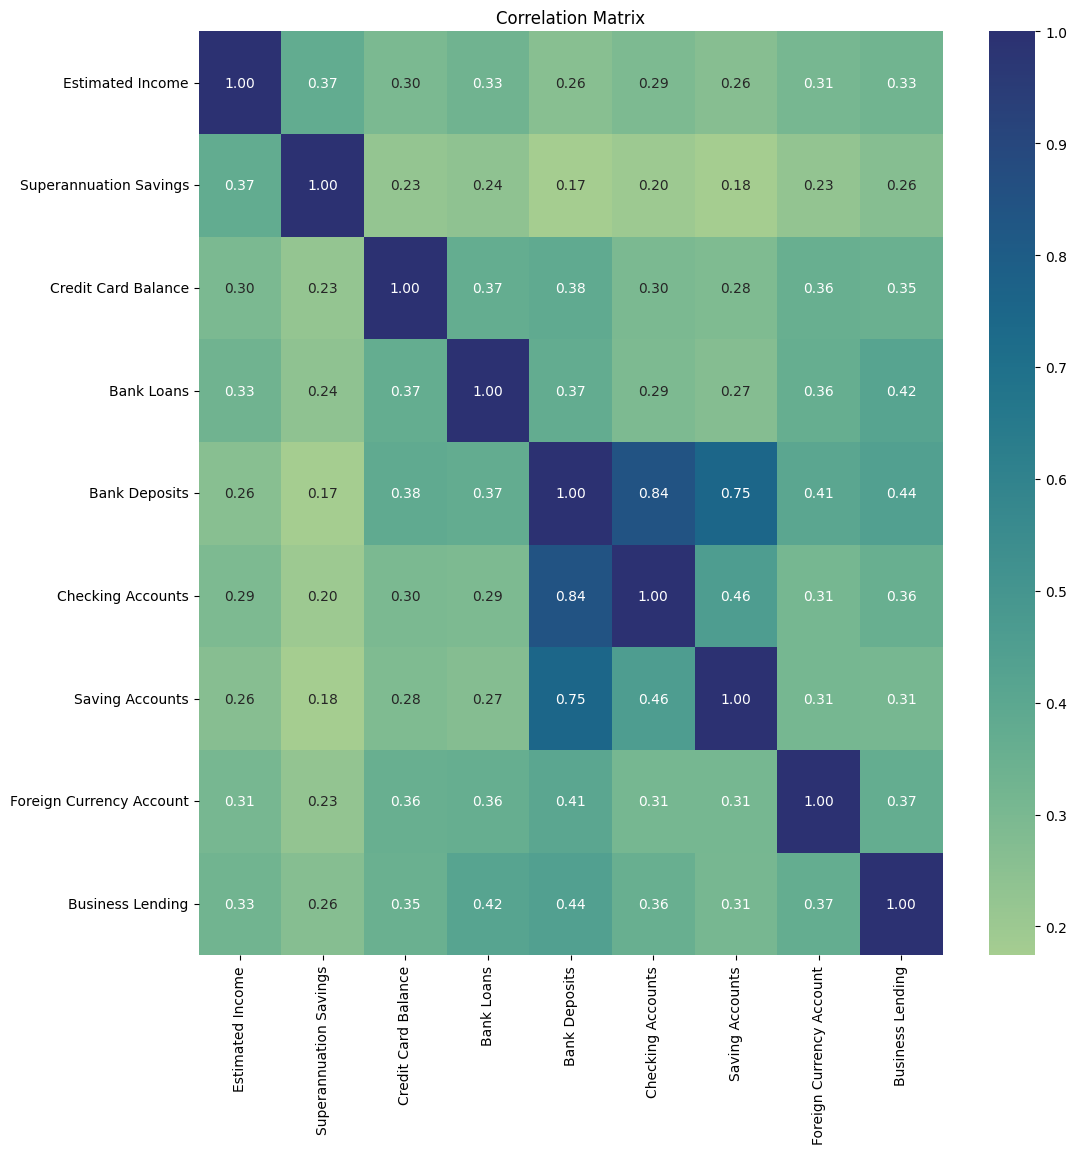

In [11]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts', 'Foreign Currency Account','Business Lending']

correlation_matrix=df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True,cmap='crest',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Plot Map

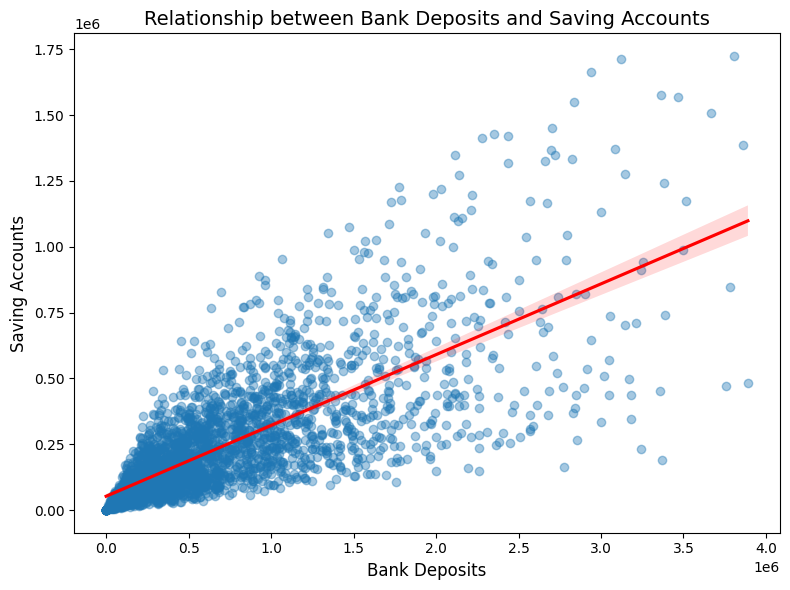

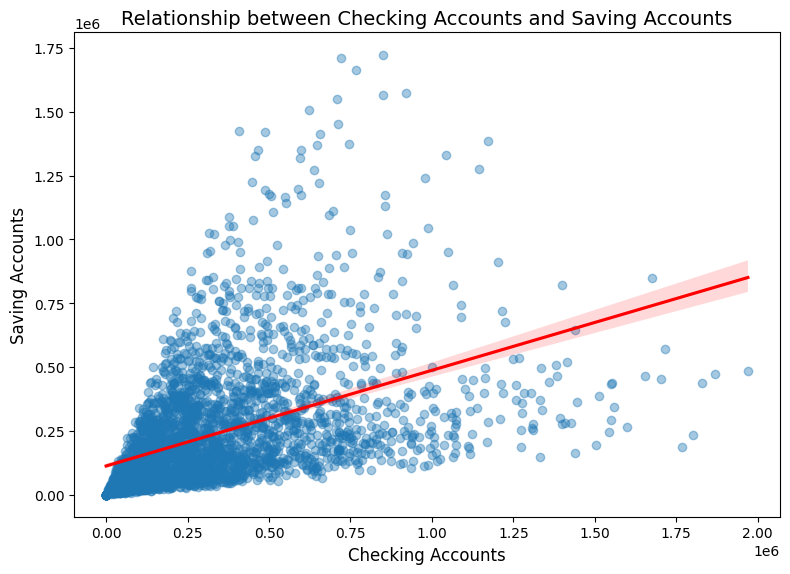

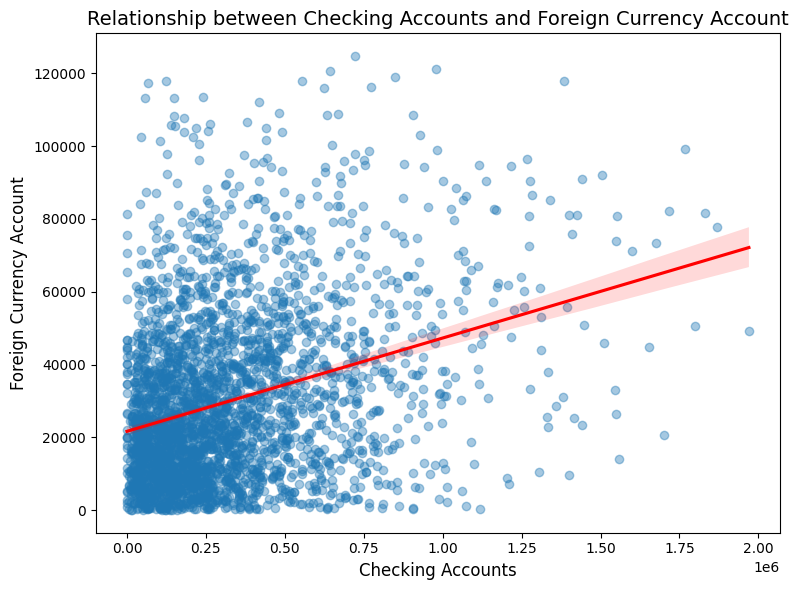

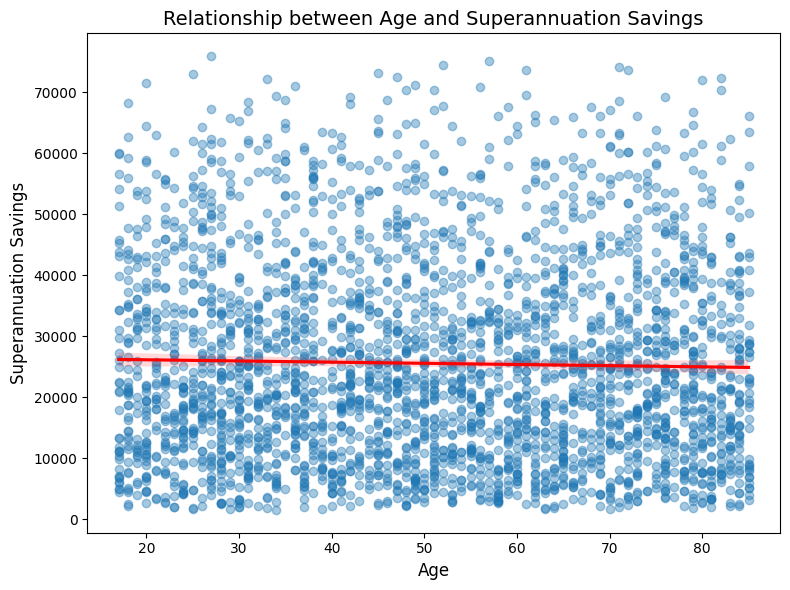

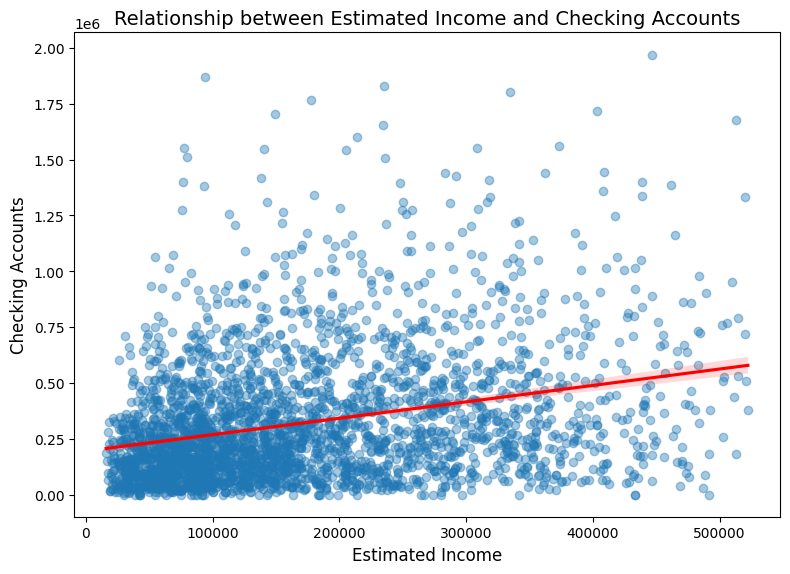

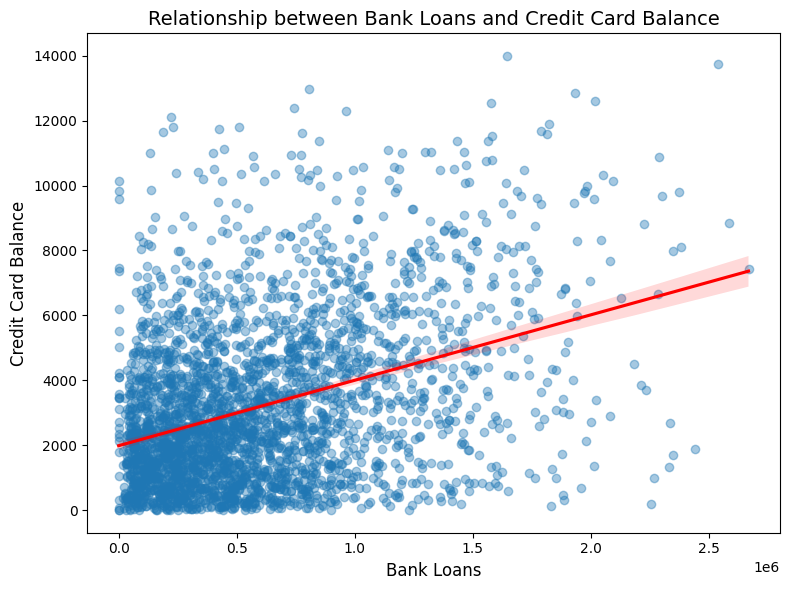

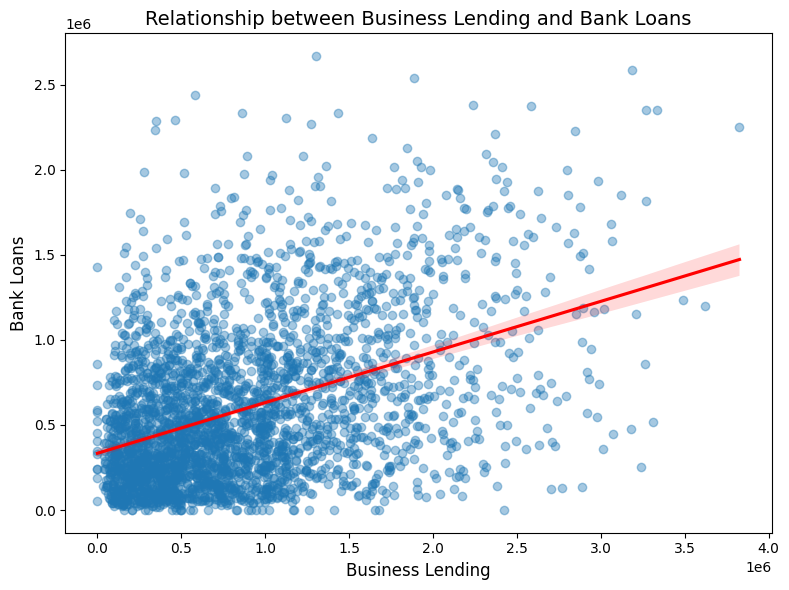

In [12]:
pairs_to_plot = [
    ('Bank Deposits', 'Saving Accounts'),
    ('Checking Accounts', 'Saving Accounts'),
    ('Checking Accounts', 'Foreign Currency Account'),
    ('Age', 'Superannuation Savings'),
    ('Estimated Income', 'Checking Accounts'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Business Lending', 'Bank Loans'),
]


for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},     # semi-transparent points
        line_kws={'color': 'red'}       # best-fit line color
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()